<a href="https://colab.research.google.com/github/sofiyaibrayeva/64061_sofiyaibrayeva/blob/main/AML_assignment%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT 2 - DEEP LEARNING FOR COMPUTER VISION

##Convolution Networks
The purpose of this assignment is to apply convolution networks (convnets) to image data.

In this assignment, we will accomplish the following:

*Apply convnets to image data.
*Explain the relationship between sample sizes and the use of training the convnets from scratch versus using a pretrained network.

##Instructions

* Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?
* Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?
* Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.
* Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.
Summarize your findings: what is the relationship between training sample size and choice of network?

In [ ]:
import numpy as np
import zipfile
import io
import os
import shutil
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

Since OSC wasn't working, I am importing files from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sofiyaibrayeva","key":"1560096d0c25eccadd082e14def579e3"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o -qq dogs-vs-cats.zip
!unzip -o -qq train.zip

In [ ]:
!pip install tensorflow==2.12

In [ ]:
path , dirs , files = next(os.walk('train'))
file_count = len(files)
print(file_count)
new_base_dir = '/dogs_vs_cats_small'
os.mkdir(new_base_dir)

25000


I'm creating directories or Train , Test and Validation data

In [ ]:
train_dir = os.path.join(new_base_dir , 'train')
os.mkdir(train_dir) #make a new train directory inside my base directory

valid_dir= os.path.join(new_base_dir , 'validation')
os.mkdir(valid_dir) #make a new validation directory inside my base directory

test_dir = os.path.join(new_base_dir , 'test')
os.mkdir(test_dir) #make a new test directory inside my base directory

train_cats_dir = os.path.join(train_dir , 'cats')
os.mkdir(train_cats_dir) #make a new cats directory inside my train directory

train_dogs_dir = os.path.join(train_dir , 'dogs')
os.mkdir(train_dogs_dir) #make a new dogs directory inside my train directory

valid_cats_dir = os.path.join(valid_dir, 'cats')
os.mkdir(valid_cats_dir) #make a new cats directory inside my validation directory

valid_dogs_dir = os.path.join(valid_dir , 'dogs')
os.mkdir(valid_dogs_dir) #make a new dogs directory inside my validation directory

test_cats_dir = os.path.join(test_dir , 'cats')
os.mkdir(test_cats_dir) #make a new cats directory inside my test directory

test_dogs_dir = os.path.join(test_dir , 'dogs')
os.mkdir(test_dogs_dir) #make a new dogs directory inside my test directory

Seeing the overall number of cat and dog images

In [ ]:
dir_path = 'train'

cat_count = 0
dog_count= 0
for i in os.listdir(dir_path):
    if i.startswith('cat.'):
        cat_count += 1
    elif i.startswith('dog.'):
        dog_count += 1

print(f"Number of cat images: {cat_count}")
print(f"Number of dog images: {dog_count}")

Number of cat images: 12500
Number of dog images: 12500


Moving images of cats and dogs to Tran, validarion and test sets with the proportion of 1000, 500 and 500 respectfully.

In [ ]:
original_dataset_dir = 'train'

fnames = ['cat.{}.jpg'.format(i) for i in range(500)] #Move 500 cat images from the original dataset to the train cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(train_cats_dir , fname)
  shutil.copyfile(src , dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(500,750)] #Move 250 cat images from the original dataset to the validation cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(valid_cats_dir , fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(750,1000)] #Move 250 cat images from the original dataset to the test cat directory
for fname in fnames:
  src= os.path.join(original_dataset_dir , fname)
  dst= os.path.join(test_cats_dir, fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(500)] #Move 500 dog images from the original dataset to the train cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(train_dogs_dir ,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(500,750)] #Move 250 dog images from the original dataset to the validation cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(valid_dogs_dir , fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(750,1000)]#Move 250 dog images from the original dataset to the test cat directory
for fname in fnames:
  src= os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir , fname)
  shutil.copyfile(src, dst)

In [ ]:
print(f'Total training cat images {len(os.listdir(train_cats_dir))}')
print(f'Total validation cat images {len(os.listdir(valid_cats_dir))}')
print(f'Total test cat images {len(os.listdir(test_cats_dir))}')
print('\n')
print(f'Total training dog images {len(os.listdir(train_dogs_dir))}')
print(f'Total validation cat images {len(os.listdir(valid_dogs_dir))}')
print(f'Total test cat images {len(os.listdir(test_dogs_dir))}')

Total training cat images 500
Total validation cat images 250
Total test cat images 250


Total training dog images 500
Total validation cat images 250
Total test cat images 250


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = (180 , 180)
batch_size = 32
img_shape = (img_size[0] , img_size[1] , 3)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_directory(train_dir , target_size = img_size , class_mode = 'binary' ,
                                       color_mode = 'rgb' , shuffle = True , batch_size = batch_size)

valid_gen = ts_gen.flow_from_directory(valid_dir , target_size = img_size , class_mode = 'binary' ,
                                       color_mode = 'rgb' , shuffle = True , batch_size = batch_size)

test_gen = ts_gen.flow_from_directory(test_dir , target_size = img_size , class_mode = 'binary' ,
                                       color_mode = 'rgb' , shuffle = False , batch_size = batch_size)

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Instantiating a convolutional neural network for image classification
##Model 1 -  filters from 32 to 256 in 5 Input Layers

This code instantiates a convolutional neural network (CNN) for image classification. The CNN is designed to classify images as either "cats" or "dogs".

The input to the CNN is a 3D tensor representing an image. The first layer of the CNN rescales the data to a value between 0 and 1.

The CNN then uses a series of convolution and max pooling layers to extract features from the images. The number of filters (depth) increases throughout the network, but the size of the windows remains the same. The size of the feature maps decreases throughout the network.

The final layer of the CNN is a dense layer that gives us the probability that the output is classified as a "cat" or as a "dog". It has one output node. In order to feed the dense layer, we first need to flatten the 3D shape in 1D.


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

#Fitting the model using a Dataset

fitting the model with the training set. We use "callbacks" because it will automatically store a file containing the weights generating from the best epoch. Starting with 10 epochs

In [ ]:
# Compilimg the results of the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Fitting/Running the Model
Model_1 = model.fit(
          train_gen,
          epochs= 10,
          validation_data= valid_gen,
          callbacks= callbacks)

Epoch 1/10
32/32 [==============================] - 17s 152ms/step - loss: 0.6965 - accuracy: 0.5160 - val_loss: 0.6928 - val_accuracy: 0.5440
Epoch 2/10
32/32 [==============================] - 3s 92ms/step - loss: 0.6929 - accuracy: 0.5250 - val_loss: 0.6909 - val_accuracy: 0.5720
Epoch 3/10
32/32 [==============================] - 3s 85ms/step - loss: 0.6828 - accuracy: 0.5780 - val_loss: 0.6849 - val_accuracy: 0.5400
Epoch 4/10
32/32 [==============================] - 3s 87ms/step - loss: 0.6764 - accuracy: 0.5770 - val_loss: 0.6502 - val_accuracy: 0.6240
Epoch 5/10
32/32 [==============================] - 4s 116ms/step - loss: 0.6177 - accuracy: 0.6610 - val_loss: 0.7469 - val_accuracy: 0.5840
Epoch 6/10
32/32 [==============================] - 3s 96ms/step - loss: 0.5947 - accuracy: 0.6670 - val_loss: 0.6477 - val_accuracy: 0.6420
Epoch 7/10
32/32 [==============================] - 3s 86ms/step - loss: 0.5739 - accuracy: 0.6700 - val_loss: 0.6383 - val_accuracy: 0.6540
Epoch 8/10

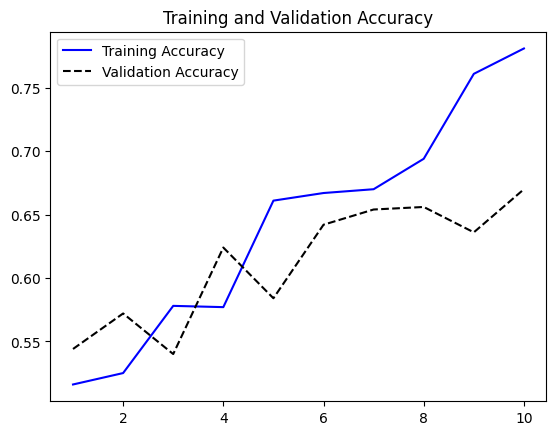

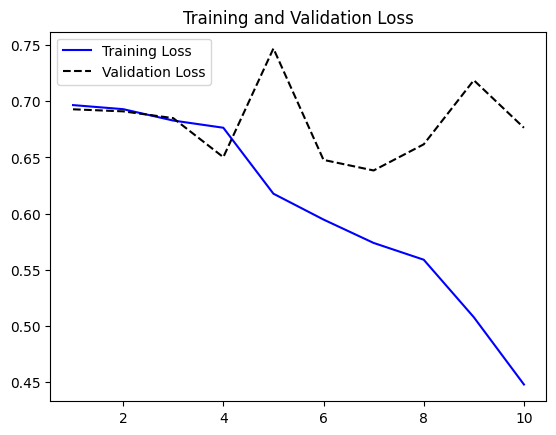

In [ ]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="black",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("model1.keras")
Model1_Results = test_model.evaluate(test_gen)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

16/16 [==============================] - 2s 106ms/step - loss: 0.6704 - accuracy: 0.5820
Loss: 0.670
Accuracy: 0.582


After 10 epochs, we see that the accuracy of the model  with no data augmentation using the first partition of data is equal to  58.2%. Running the model for more epochs can lead to better results.

In [ ]:
import logging
logging.getLogger('tensorflow').disabled = True

# Defining a data augmentation stage to add to an image model

This code defines a data augmentation stage to add to an image model. Data augmentation is a technique for generating new training data by applying random transformations to existing data. This can help to improve the accuracy of the model, especially when the training dataset is small.

The data augmentation stage in this code randomly flips, rotates, and zooms the images. This will make the training data more diverse and help the model to learn more robust features.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

#Model 2 - Now we add the data augmentation step to our network at the beginning. In order to prevent overfitting, we also add dropout as the last layer before feeding the dense layer. We also increase epochs from 10 to 30

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Fitting/Running the Model
Model_2 = model.fit(
          train_gen,
          epochs= 30,
          validation_data= valid_gen,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 6s 97ms/step - loss: 0.6969 - accuracy: 0.4910 - val_loss: 0.6901 - val_accuracy: 0.5500
Epoch 2/30
32/32 [==============================] - 4s 126ms/step - loss: 0.6847 - accuracy: 0.5480 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 3/30
32/32 [==============================] - 3s 83ms/step - loss: 0.6953 - accuracy: 0.4950 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 3s 88ms/step - loss: 0.6829 - accuracy: 0.5420 - val_loss: 0.6685 - val_accuracy: 0.5960
Epoch 5/30
32/32 [==============================] - 3s 82ms/step - loss: 0.6883 - accuracy: 0.5420 - val_loss: 0.7955 - val_accuracy: 0.5280
Epoch 6/30
32/32 [==============================] - 3s 95ms/step - loss: 0.6859 - accuracy: 0.5460 - val_loss: 0.6903 - val_accuracy: 0.5060
Epoch 7/30
32/32 [==============================] - 4s 124ms/step - loss: 0.6865 - accuracy: 0.4950 - val_loss: 0.6884 - val_accuracy: 0.5160
Epoch 8/30


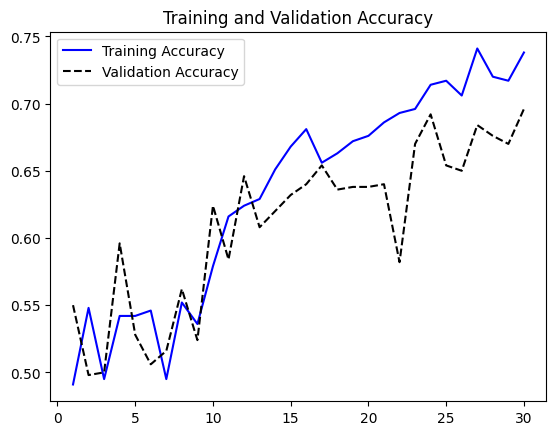

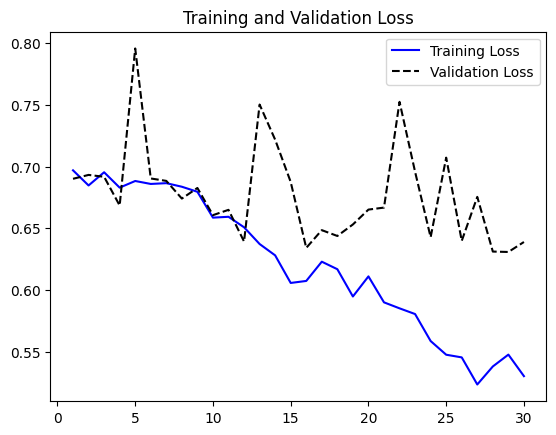

In [ ]:
accuracy = Model_2.history["accuracy"]
val_accuracy = Model_2.history["val_accuracy"]

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="black",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("model2.keras")
Model2_Results = test_model.evaluate(test_gen)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

16/16 [==============================] - 2s 97ms/step - loss: 0.6477 - accuracy: 0.6780
Loss: 0.648
Accuracy: 0.678


##Accuracy on the test set from the model with data augmentation using the first partition of data is equal to 67.8%. We obtained a slightly better result.


#Model 3 -  Increasingfilters from 32 to 512 in 6 Input Layers with the use of Augmented Images and Dropout rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, None)  0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.keras",
            save_best_only= True,
            monitor= "val_loss")


# Model Fit
Model_3 = model.fit(
          train_gen,
          epochs= 30,
          validation_data= valid_gen,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 6s 99ms/step - loss: 0.6951 - accuracy: 0.4890 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 4s 112ms/step - loss: 0.6910 - accuracy: 0.5230 - val_loss: 0.6925 - val_accuracy: 0.5040
Epoch 3/30
32/32 [==============================] - 4s 111ms/step - loss: 0.6926 - accuracy: 0.5130 - val_loss: 0.6908 - val_accuracy: 0.5320
Epoch 4/30
32/32 [==============================] - 3s 88ms/step - loss: 0.6845 - accuracy: 0.5680 - val_loss: 0.6900 - val_accuracy: 0.5160
Epoch 5/30
32/32 [==============================] - 3s 85ms/step - loss: 0.6804 - accuracy: 0.5810 - val_loss: 0.6852 - val_accuracy: 0.5080
Epoch 6/30
32/32 [==============================] - 3s 91ms/step - loss: 0.6744 - accuracy: 0.5730 - val_loss: 0.6895 - val_accuracy: 0.5080
Epoch 7/30
32/32 [==============================] - 4s 121ms/step - loss: 0.6832 - accuracy: 0.5440 - val_loss: 0.6978 - val_accuracy: 0.5140
Epoch 8/30

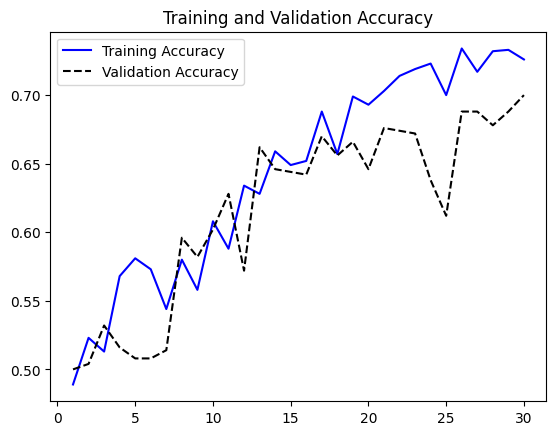

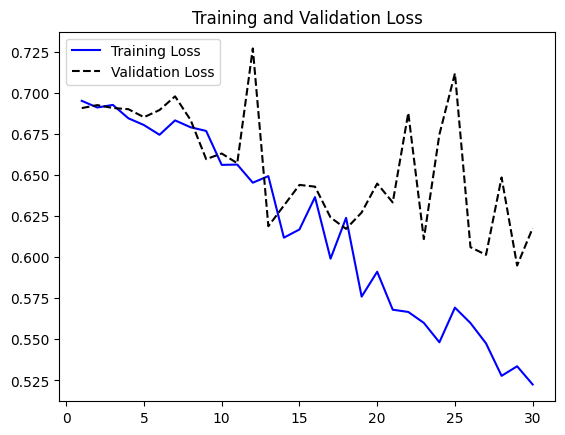

In [ ]:
accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="black", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model3.keras")
Model3_Results = best_model.evaluate(test_gen)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

16/16 [==============================] - 2s 110ms/step - loss: 0.6058 - accuracy: 0.6780
Loss: 0.606
Accuracy: 0.678


#Model 1- accuracy =58.2%
#Model 2 - accuracy= 67.8%
#Model 3 - accuracy= 67.8%

##we can conclude that model 2 is the best best model with higher accuracy and minimum loss. Because of that, we should picl a model with filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5

#Increasing your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?
* Training Size - from 1000 tp 2000
Both validation set and test set sizes will not change from the first data partition. This is our second data partition.

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
data_augmentation_1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

#Model 4 - trainng size of 2000 with filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model5.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_4 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 10s 102ms/step - loss: 0.6935 - accuracy: 0.5045 - val_loss: 0.6972 - val_accuracy: 0.5140
Epoch 2/50
63/63 [==============================] - 4s 57ms/step - loss: 0.6983 - accuracy: 0.5240 - val_loss: 0.6899 - val_accuracy: 0.5060
Epoch 3/50
63/63 [==============================] - 4s 58ms/step - loss: 0.6900 - accuracy: 0.5495 - val_loss: 0.6651 - val_accuracy: 0.6060
Epoch 4/50
63/63 [==============================] - 6s 87ms/step - loss: 0.6764 - accuracy: 0.5855 - val_loss: 0.6648 - val_accuracy: 0.5960
Epoch 5/50
63/63 [==============================] - 4s 57ms/step - loss: 0.6617 - accuracy: 0.6115 - val_loss: 0.6604 - val_accuracy: 0.5720
Epoch 6/50
63/63 [==============================] - 6s 87ms/step - loss: 0.6438 - accuracy: 0.6310 - val_loss: 0.6616 - val_accuracy: 0.5600
Epoch 7/50
63/63 [==============================] - 4s 57ms/step - loss: 0.6459 - accuracy: 0.6355 - val_loss: 0.6450 - val_accuracy: 0.6140
Epoch 8/50


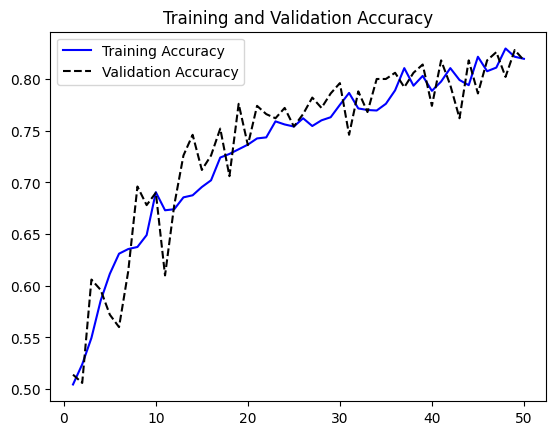

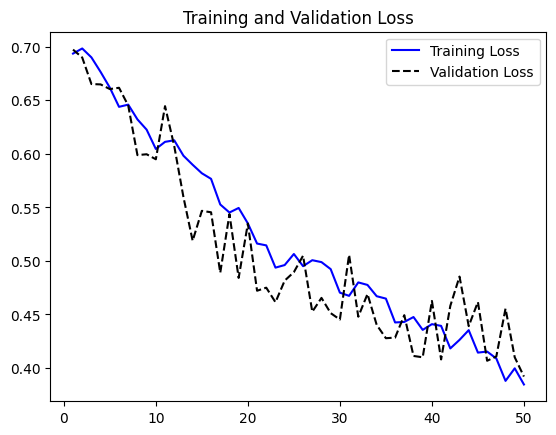

In [ ]:
accuracy = Model_4.history["accuracy"]
val_accuracy = Model_4.history["val_accuracy"]

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="black", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model4.keras")
Model5_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

16/16 [==============================] - 1s 41ms/step - loss: 0.4783 - accuracy: 0.7960
Loss: 0.478
Accuracy: 0.796


The same model that was  built only with 1000 training samples resulted in 67.8% accuracy but this model with the train sixe pf  2000 increased the accuracy to 79.6%
* Overall, the results of this experiment suggest that increasing the size of the training dataset can be a very effective way to improve the accuracy of machine learning models.

#Model: A convolutional neural network (CNN) with 6 strides, same padding, and increasing filters from 32 to 256 in 5 input layers. The model is trained on augmented images with a dropout rate of 0.5.

 The 6 strides allow the model to learn features at a larger scale, while the same padding ensures that the spatial resolution of the feature maps remains the same. The increasing number of filters in the input layers allows the model to learn more complex features.

Augmenting the images helps to improve the accuracy of the model by making the training data more diverse. The dropout rate of 0.5 helps to prevent overfitting by randomly dropping out neurons during training.

Overall, this CNN architecture is well-suited for image classification tasks. It is likely to achieve good results on a variety of image classification datasets, even with a relatively small training sample size of 2000.

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 90, 90, 32)        896       
                                                                 
 conv2d_22 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 23, 23, 128)       73856     
                                                                 
 conv2d_24 (Conv2D)          (None, 12, 12, 256)       2951

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model6.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_5 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 9s 87ms/step - loss: 0.6942 - accuracy: 0.5105 - val_loss: 0.6919 - val_accuracy: 0.5060
Epoch 2/50
63/63 [==============================] - 4s 61ms/step - loss: 0.6951 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 3s 51ms/step - loss: 0.6933 - accuracy: 0.5150 - val_loss: 0.6928 - val_accuracy: 0.4980
Epoch 4/50
63/63 [==============================] - 5s 68ms/step - loss: 0.6918 - accuracy: 0.5200 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 5/50
63/63 [==============================] - 5s 68ms/step - loss: 0.6945 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
63/63 [==============================] - 3s 50ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6884 - val_accuracy: 0.5460
Epoch 7/50
63/63 [==============================] - 3s 50ms/step - loss: 0.6925 - accuracy: 0.5095 - val_loss: 0.6930 - val_accuracy: 0.4960
Epoch 8/50
63

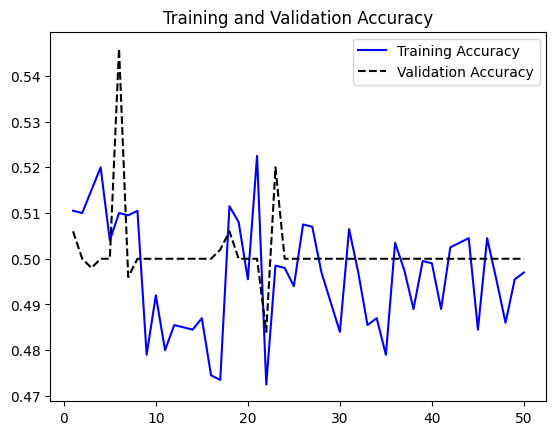

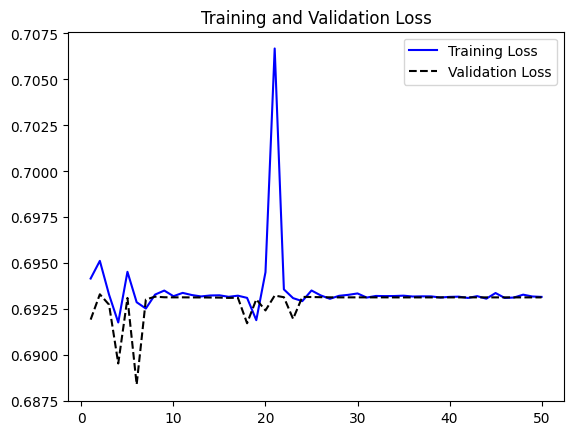

In [ ]:
accuracy = Model_5.history["accuracy"]
val_accuracy = Model_5.history["val_accuracy"]

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="black", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model5.keras")
Model6_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

16/16 [==============================] - 1s 36ms/step - loss: 0.6933 - accuracy: 0.5500
Loss: 0.693
Accuracy: 0.550


##We can see that the accuracy of the model has decresed. Which means that we should stick to filters 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5. Meaning that using strides with padding did not improve the perfomance of the model.

#3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results
##Increasing the training size to 4000


In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
data_augmentation_2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

##Model - Since last perfomances indicated that we should utilize filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5, we are building the model with 7 MaxPooling Operation with Increase Training Size of 4000

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model7.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_6 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
125/125 [==============================] - 14s 87ms/step - loss: 0.6920 - accuracy: 0.5253 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/50
125/125 [==============================] - 10s 76ms/step - loss: 0.6876 - accuracy: 0.5347 - val_loss: 0.6626 - val_accuracy: 0.5880
Epoch 3/50
125/125 [==============================] - 7s 54ms/step - loss: 0.6655 - accuracy: 0.6100 - val_loss: 0.6526 - val_accuracy: 0.6080
Epoch 4/50
125/125 [==============================] - 9s 73ms/step - loss: 0.6470 - accuracy: 0.6373 - val_loss: 0.6214 - val_accuracy: 0.6340
Epoch 5/50
125/125 [==============================] - 7s 55ms/step - loss: 0.6393 - accuracy: 0.6465 - val_loss: 0.5911 - val_accuracy: 0.6760
Epoch 6/50
125/125 [==============================] - 10s 75ms/step - loss: 0.6232 - accuracy: 0.6607 - val_loss: 0.5687 - val_accuracy: 0.6720
Epoch 7/50
125/125 [==============================] - 7s 54ms/step - loss: 0.5967 - accuracy: 0.6812 - val_loss: 0.5350 - val_accuracy: 0.7

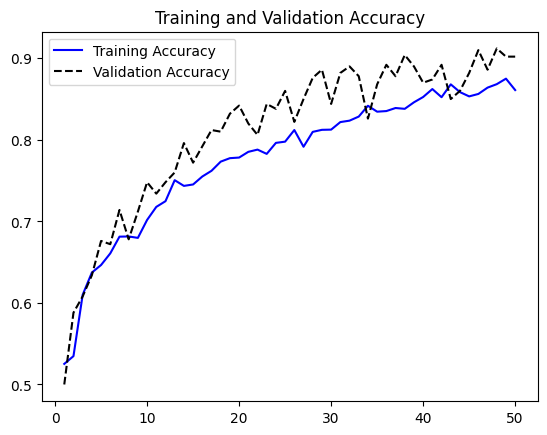

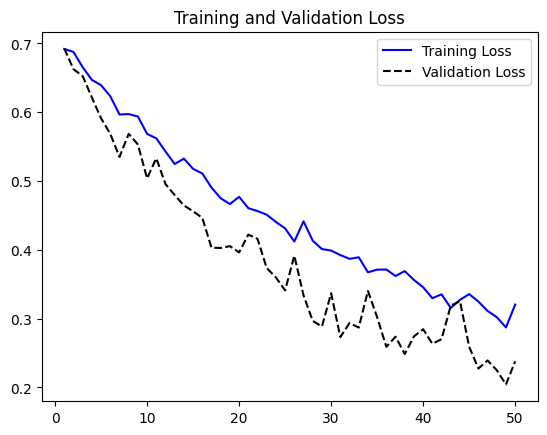

In [ ]:
accuracy = Model_6.history["accuracy"]
val_accuracy = Model_6.history["val_accuracy"]

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="black", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model6.keras")
Model7_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

16/16 [==============================] - 1s 45ms/step - loss: 0.2208 - accuracy: 0.9020
Loss: 0.221
Accuracy: 0.902


##The accuracy of the model has increased to 90.2%

# MaxPooling + Strides of Step-Size 2 with Padding turned on Operation with Increase in filters from 32 to 512 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model9.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_7 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
125/125 [==============================] - 13s 65ms/step - loss: 0.6965 - accuracy: 0.5290 - val_loss: 0.6784 - val_accuracy: 0.5180
Epoch 2/50
125/125 [==============================] - 8s 60ms/step - loss: 0.6873 - accuracy: 0.5322 - val_loss: 0.6841 - val_accuracy: 0.5000
Epoch 3/50
125/125 [==============================] - 8s 62ms/step - loss: 0.6884 - accuracy: 0.5235 - val_loss: 0.7091 - val_accuracy: 0.5180
Epoch 4/50
125/125 [==============================] - 8s 59ms/step - loss: 0.6883 - accuracy: 0.5278 - val_loss: 0.6830 - val_accuracy: 0.5620
Epoch 5/50
125/125 [==============================] - 10s 76ms/step - loss: 0.6830 - accuracy: 0.5515 - val_loss: 0.6821 - val_accuracy: 0.5440
Epoch 6/50
125/125 [==============================] - 12s 93ms/step - loss: 0.6827 - accuracy: 0.5560 - val_loss: 0.6403 - val_accuracy: 0.6260
Epoch 7/50
125/125 [==============================] - 10s 76ms/step - loss: 0.6676 - accuracy: 0.5982 - val_loss: 0.6235 - val_accuracy: 0.

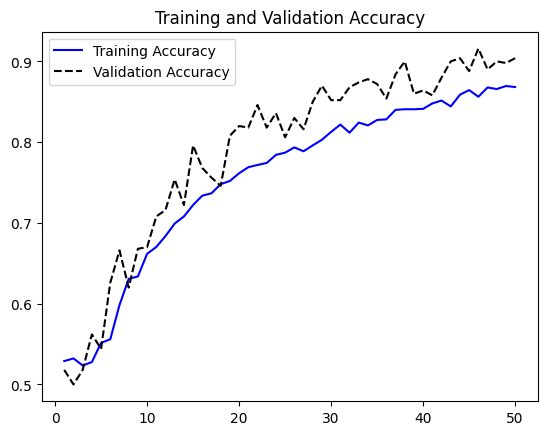

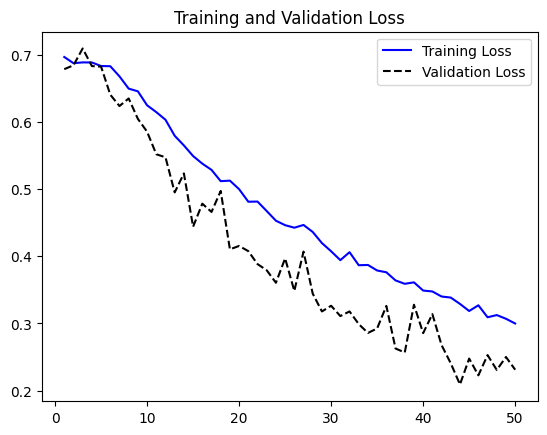

In [ ]:
accuracy = Model_7.history["accuracy"]
val_accuracy = Model_7.history["val_accuracy"]

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="black", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model7.keras")
Model9_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model7_Results[0]:.3f}')
print(f'Accuracy: {Model7_Results[1]:.3f}')

16/16 [==============================] - 1s 28ms/step - loss: 0.2524 - accuracy: 0.8940
Loss: 0.252
Accuracy: 0.894


The accuracy of the model has decresed to 89.4%

##Increasing the training size to 6000

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=3000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 6000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
data_augmentation_3 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

##MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_3(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model10.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_8 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
188/188 [==============================] - 15s 66ms/step - loss: 0.6910 - accuracy: 0.5203 - val_loss: 0.6913 - val_accuracy: 0.5080
Epoch 2/50
188/188 [==============================] - 13s 64ms/step - loss: 0.6835 - accuracy: 0.5658 - val_loss: 0.6558 - val_accuracy: 0.6360
Epoch 3/50
188/188 [==============================] - 13s 66ms/step - loss: 0.6550 - accuracy: 0.6107 - val_loss: 0.6381 - val_accuracy: 0.6580
Epoch 4/50
188/188 [==============================] - 12s 63ms/step - loss: 0.6462 - accuracy: 0.6323 - val_loss: 0.5961 - val_accuracy: 0.6860
Epoch 5/50
188/188 [==============================] - 14s 75ms/step - loss: 0.6249 - accuracy: 0.6522 - val_loss: 0.6298 - val_accuracy: 0.6300
Epoch 6/50
188/188 [==============================] - 11s 56ms/step - loss: 0.6070 - accuracy: 0.6772 - val_loss: 0.5578 - val_accuracy: 0.7220
Epoch 7/50
188/188 [==============================] - 12s 64ms/step - loss: 0.5986 - accuracy: 0.6833 - val_loss: 0.5423 - val_accuracy:

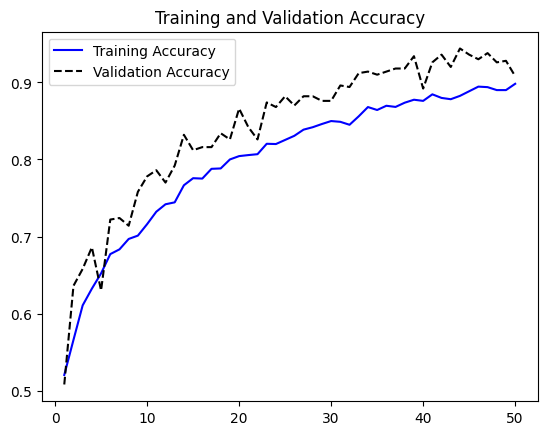

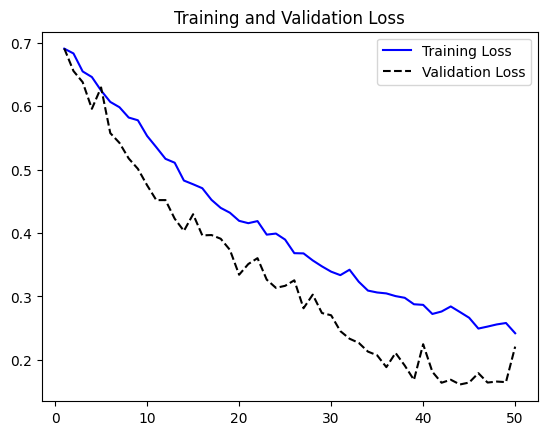

In [ ]:
accuracy = Model_8.history["accuracy"]
val_accuracy = Model_8.history["val_accuracy"]

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="blue", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="black", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model8.keras")
Model10_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model8_Results[0]:.3f}')
print(f'Accuracy: {Model8_Results[1]:.3f}')

16/16 [==============================] - 1s 30ms/step - loss: 0.2432 - accuracy: 0.9080
Loss: 0.243
Accuracy: 0.908


##The results of this experiment clearly demonstrate the importance of training data size in machine learning. The model that was trained on 6000 training samples outperformed all of the other models, including the model that was trained on only 1000 training samples. This suggests that increasing the size of the training dataset can be a very effective way to improve the accuracy of machine learning models.

There are a few possible explanations for this improvement. One possibility is that the larger training dataset allows the model to learn more robust features. When the model has more data to train on, it can better understand the relationships between the different features in the data. This can lead to a model that is better able to generalize to new data and make more accurate predictions.

# Using a pretrained network
For the last section of the assignment we want to use a pretrained network, that is a network that was previously trained on a large dataset. If this original dataset is large enough and general enough, then the pretrained network can effectively act as a generic model and its features can prove useful for many different computer vision problems. Such portability of learned features across different problems is a key advantage of deep learning compared to other machine learning approaches.

#Feature extraction - Instantiating the VGG16 convolutional base


In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
#extracting features and Labels
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 23ms/step


In [ ]:
train_features.shape

(6000, 5, 5, 512)

The model has one dense layer with 256 nodes, followed by a dropout layer with a dropout rate of 0.5, and finally a dense layer with 1 node and a sigmoid activation function.

The model is trained using the RMSprop optimizer and the binary crossentropy loss function. The validation loss is monitored using the ModelCheckpoint callback, and the best model is saved to the file vgg_model1.keras.

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath="vgg_model1.keras",
            save_best_only=True,
            monitor="val_loss")


# Model Fit
VGG_Model_1 = model.fit(
              train_features, train_labels,
              epochs= 30,
              validation_data= (val_features, val_labels),
              callbacks= callbacks)

Epoch 1/30
188/188 [==============================] - 4s 10ms/step - loss: 10.5213 - accuracy: 0.9485 - val_loss: 4.0638 - val_accuracy: 0.9820
Epoch 2/30
188/188 [==============================] - 2s 9ms/step - loss: 3.8523 - accuracy: 0.9780 - val_loss: 0.1135 - val_accuracy: 0.9980
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 2.5077 - accuracy: 0.9843 - val_loss: 9.7550e-15 - val_accuracy: 1.0000
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.9563 - accuracy: 0.9922 - val_loss: 0.1909 - val_accuracy: 0.9980
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 1.0039 - accuracy: 0.9927 - val_loss: 0.0366 - val_accuracy: 0.9980
Epoch 6/30
188/188 [==============================] - 1s 7ms/step - loss: 0.9694 - accuracy: 0.9938 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
188/188 [==============================] - 1s 7ms/step - loss: 0.7408 - accuracy: 0.9945 - val_loss: 1.6799e-07 - val_accuracy:

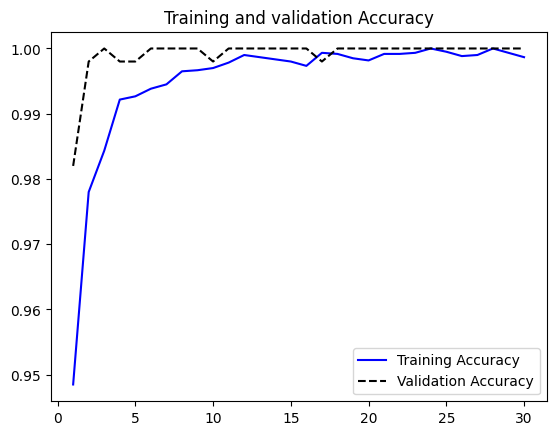

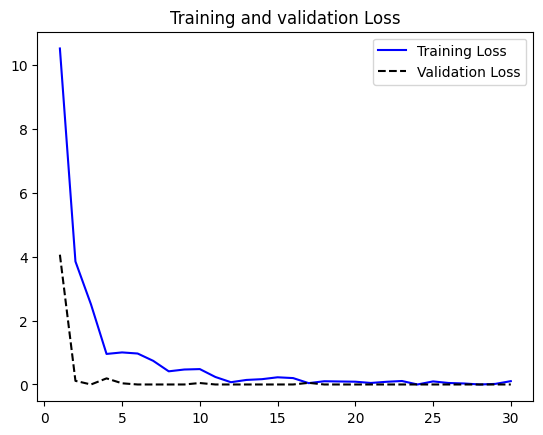

In [ ]:
acc = VGG_Model_1.history["accuracy"]
val_acc = VGG_Model_1.history["val_accuracy"]

loss = VGG_Model_1.history["loss"]
val_loss = VGG_Model_1.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="blue", label="Training Accuracy")
plt.plot(epochs, val_acc, color="black", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("vgg_model1.keras")
VGG_Model_1_Results = best_model.evaluate(test_features,test_labels)
print(f'Loss: {VGG_Model_1_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_1_Results[1]:.3f}')

16/16 [==============================] - 0s 3ms/step - loss: 2.2427e-30 - accuracy: 1.0000
Loss: 0.000
Accuracy: 1.000


##The accuracy of the pretrained model is 100%

In [ ]:
conv_base= keras.applications.vgg16.VGG16(
           weights="imagenet",
           include_top=False)

conv_base.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 6000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# Data Augmentation
data_augmentation_4 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_4(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model3.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_3 = model.fit(
              train_dataset,
              epochs= 50,
              validation_data=validation_dataset,
              callbacks=callbacks)

Epoch 1/50
188/188 [==============================] - 22s 104ms/step - loss: 9.8406 - accuracy: 0.9158 - val_loss: 1.5387 - val_accuracy: 0.9840
Epoch 2/50
188/188 [==============================] - 20s 102ms/step - loss: 5.5200 - accuracy: 0.9425 - val_loss: 2.3925 - val_accuracy: 0.9820
Epoch 3/50
188/188 [==============================] - 20s 104ms/step - loss: 4.0259 - accuracy: 0.9498 - val_loss: 0.3403 - val_accuracy: 0.9920
Epoch 4/50
188/188 [==============================] - 20s 106ms/step - loss: 1.9993 - accuracy: 0.9568 - val_loss: 0.1631 - val_accuracy: 0.9900
Epoch 5/50
188/188 [==============================] - 20s 105ms/step - loss: 1.1345 - accuracy: 0.9553 - val_loss: 0.1281 - val_accuracy: 0.9920
Epoch 6/50
188/188 [==============================] - 20s 104ms/step - loss: 0.5887 - accuracy: 0.9553 - val_loss: 0.0403 - val_accuracy: 0.9960
Epoch 7/50
188/188 [==============================] - 21s 109ms/step - loss: 0.4174 - accuracy: 0.9583 - val_loss: 0.0505 - val_ac

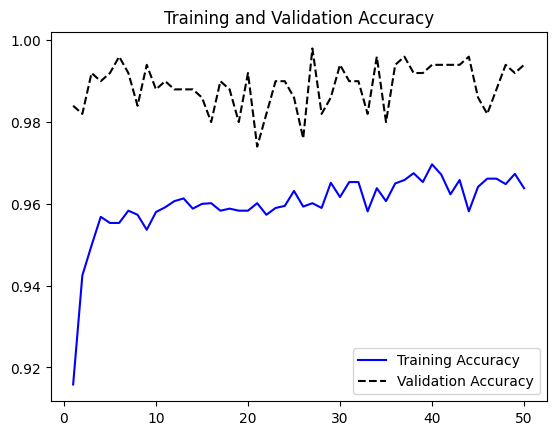

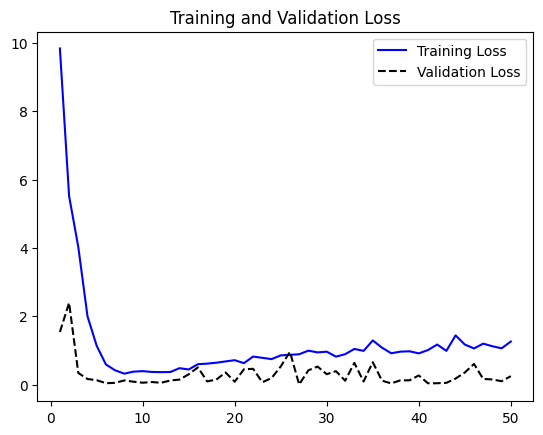

In [ ]:
acc = VGG_Model_3.history["accuracy"]
val_acc = VGG_Model_3.history["val_accuracy"]

loss = VGG_Model_3.history["loss"]
val_loss = VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="blue", label="Training Accuracy")
plt.plot(epochs, val_acc, color="black", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="blue", label="Training Loss")
plt.plot(epochs, val_loss, color="black", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("vgg_model3.keras")
VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {VGG_Model_3_Results[1]:.3f}")

16/16 [==============================] - 2s 97ms/step - loss: 0.1451 - accuracy: 0.9940
Loss: 0.145
Accuracy: 0.994


Pre-trained networks are not just for image classification. They are trained to handle a variety of tasks and classifications. The early layers of a pre-trained network learn general features, while the later layers learn more specific features. By freezing the early layers, we can prevent overfitting and allow the model to learn the nuances of our specific classification task. This approach encourages the model to focus on the features that are most important for the task at hand.
##So, in order to optimize VGG_Model3, we have chosen to freeze the initial four layers.

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model3.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_3 = model.fit(
                        train_dataset,
                        epochs=50,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

Epoch 1/50
188/188 [==============================] - 27s 129ms/step - loss: 0.7568 - accuracy: 0.9650 - val_loss: 0.0624 - val_accuracy: 0.9960
Epoch 2/50
188/188 [==============================] - 24s 128ms/step - loss: 0.3776 - accuracy: 0.9717 - val_loss: 0.0080 - val_accuracy: 0.9960
Epoch 3/50
188/188 [==============================] - 24s 129ms/step - loss: 0.3441 - accuracy: 0.9720 - val_loss: 0.0021 - val_accuracy: 0.9980
Epoch 4/50
188/188 [==============================] - 24s 126ms/step - loss: 0.2875 - accuracy: 0.9747 - val_loss: 0.0041 - val_accuracy: 0.9980
Epoch 5/50
188/188 [==============================] - 24s 125ms/step - loss: 0.2442 - accuracy: 0.9730 - val_loss: 0.0117 - val_accuracy: 0.9980
Epoch 6/50
188/188 [==============================] - 24s 129ms/step - loss: 0.1973 - accuracy: 0.9775 - val_loss: 0.0020 - val_accuracy: 0.9980
Epoch 7/50
188/188 [==============================] - 24s 129ms/step - loss: 0.1457 - accuracy: 0.9793 - val_loss: 0.0080 - val_ac

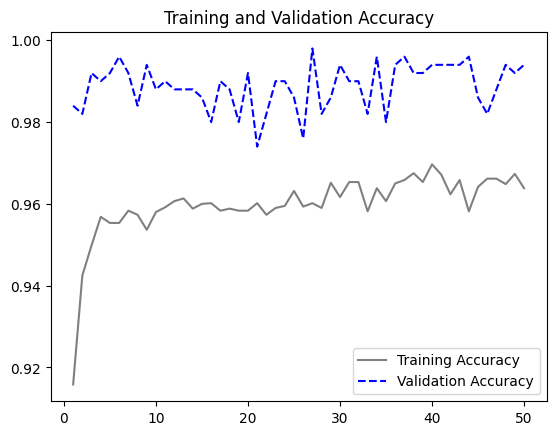

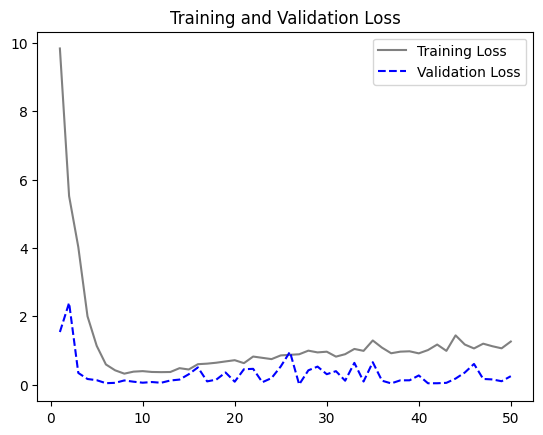

In [ ]:
val_acc = VGG_Model_3.history["val_accuracy"]

loss = VGG_Model_3.history["loss"]
val_loss = VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("fine_tuning_vgg_model3.keras")
FineTuned_VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_3_Results[1]:.3f}")

16/16 [==============================] - 2s 93ms/step - loss: 0.0017 - accuracy: 1.0000
Loss: 0.002
Accuracy: 1.000


##After freezing four layers of the pretrained model, we have incresed the accuracy to 100%

##Comparing all of the models by creating visuals

In [ ]:
Model_1 = (0.670, 0.582)
Model_2 = (0.648, 0.678)
Model_3 = (0.606,0.678)
Model_4 = (0.478, 0.796)
Model_5 = (0.693,0.550)
Model_6 = (0.221,0.902)
Model_7 = (0.252,0.894)
Model_8 = (0.243,0.908)

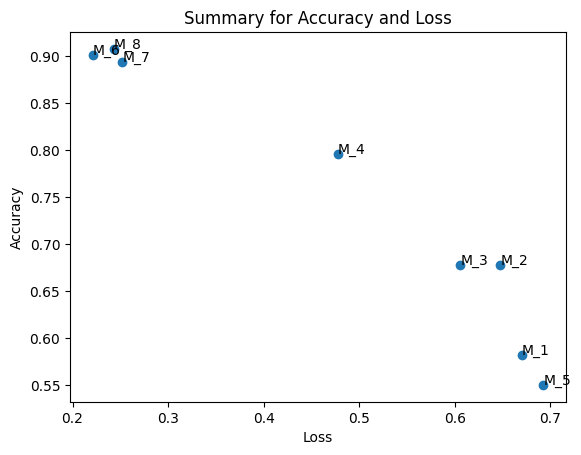

In [ ]:
Models_4 = ("M_1","M_2","M_3","M_4","M_5","M_6","M_7","M_8")
Loss_4 = (Model_1[0],Model_2[0],Model_3[0],Model_4[0],Model_5[0],Model_6[0],Model_7[0],Model_8[0])
Accuracy_4 = (Model_1[1],Model_2[1],Model_3[1],Model_4[1],Model_5[1],Model_6[1],Model_7[1],Model_8[1])

fig, ax = plt.subplots()
ax.scatter(Loss_4,Accuracy_4)
for i, txt in enumerate(Models_4):
    ax.annotate(txt, (Loss_4[i],Accuracy_4[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

In [92]:
VGG_Model_1 = (0.00,100)
VGG_Model_2 = (0.145,0.994)
FineTuned_VGG_Model_2 = (0.00,100)

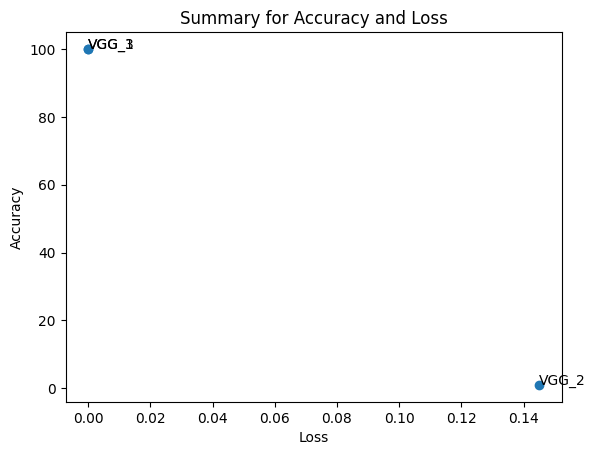

In [93]:
Models_5 = ("VGG_1","VGG_2","VGG_3")
Loss_5 = (VGG_Model_1[0],VGG_Model_2[0],FineTuned_VGG_Model_2[0])
Accuracy_5 = (VGG_Model_1[1],VGG_Model_2[1],FineTuned_VGG_Model_2[1])

fig, ax = plt.subplots()
ax.scatter(Loss_5,Accuracy_5)
for i, txt in enumerate(Models_5):
    ax.annotate(txt, (Loss_5[i],Accuracy_5[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

#Conclusion
The performance of our models depended on several factors, the most important of which was the initial choice of training a model from scratch or using a pre-trained model. Even with the best configuration, our scratch models were unlikely to achieve the same accuracy as the pre-trained model.

However, we were able to achieve decent performance on Model 6,7,8. Across different configurations, the biggest impact on performance came from a larger training set and the incresed number of epochos. We could try developing our model using other partitions to see if we can improve the results. Another way to further improve our network is to increase the number of epochs even more, since the validation accuracy was still improving. Finally, modifying the network structure (number of layers, loss metric, activation functions) may also lead to better performance.

Best perfomances of the trained models by scratch were achieved by models 6,7,8:

* M6- MaxPooling Operation,filters from 32 to 512, 5 Input Layers, Augmented Images, droput rate of 0.5, Training Size - 4.000.
* M7- MaxPooling + Strides of Step-Size 2 with Padding turned on,filters from 32 to 512, 5 Input Layers,Augmented Images, droput rate of 0.5, Training Size - 4000.
* M8- filters from 32 to 512, 5 Input Layers,Augmented Images, droput rate of 0.5, Training Size - 6000

Based on tabove data, Model_8 is the best performing model, with an accuracy of 90.8%. This model has the most training samples (6000) and the most filters (512). It is also the only model that uses a max pooling operation with strides of step-size 2 and padding turned on.

The other models have varying levels of accuracy, but they all perform worse than Model_8. Model_4 has the lowest accuracy (47.8%), despite having a relatively large training sample size (2000). This suggests that the model architecture may be important for improving accuracy.

Overall, the results suggest that increasing the number of training samples and using a max pooling operation with strides of step-size 2 and padding turned on can improve the accuracy of image classification models.

Training sample size: Model_8 has the most training samples (6000), which may have helped it to learn more complex features and relationships in the data.
Number of filters: Model_8 also has the most filters (512), which allows it to learn more complex features.
Max pooling operation: The max pooling operation with strides of step-size 2 and padding turned on helps to reduce the spatial resolution of the feature maps while preserving the most important information. This can help to improve the accuracy of the model by making it more robust to noise and variations in the input data.

#Reccomendations
If choosing whether to start from scratch or use a pre-trained model, it is heavile suggested using the latter for superior accuracy. Even with optimal configurations, scratch models struggled to match the pre-trained model's prowess.

However, within our scratch models, Models 6, 7, and 8 emerged as stars, achieving commendable performance. The game-changers were a larger training set and increased epochs, showcasing their influence on boosting accuracy. To further elevate our models, exploring different data partitions could be worth a shot. Additionally, pushing the epoch count higher, given the ongoing improvement in validation accuracy, might unlock more potential. Modifying the network structure, tweaking layers, loss metrics, or activation functions, offers another avenue for enhancement.

Among these scratch models, Model 8 shines the brightest with an accuracy of 90.8%. With a  6,000 training samples and 512 filters, it stands out. The max pooling operation with strategic strides and padding likely contributes to its success. In contrast, Model 4, despite a decently sized training set (2000), lags with the lowest accuracy (47.8%), suggesting the importance of model architecture.

In summary, the results point towards a winning formula: increase the training sample size, maximize the number of filters, and leverage a max pooling operation with specific strides and padding. Model 8 is showcasing the impact of these elements.





